# Load File

In [1]:
import numpy as np
import pandas as pd
red_wine = pd.read_csv("winequality-red.csv",sep=';')
white_wine = pd.read_csv("winequality-white.csv",sep=';')

In dataset has 2 files, winequality-white.csv and winequality-red.csv

# Preprocess

## Show data

In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Both data sets have the same column but diffirent in type of wine

## Check NULL

In [4]:
red_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
white_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Don't have any null in any column

## Join 2 columns together

Create a new column to specify the type of wine and then join 2 columns together 

In [6]:
white_wine['type'] = 'white'
red_wine['type'] = 'red'
wine=pd.concat([white_wine,red_wine])
white_wine = white_wine.drop(columns = 'type')
red_wine = red_wine.drop(columns = 'type')

In [7]:
white_wine['bound_sulfer_dioxide'] = white_wine['total sulfur dioxide'] - white_wine['free sulfur dioxide']

In [8]:
red_wine['bound_sulfer_dioxide'] = red_wine['total sulfur dioxide'] - red_wine['free sulfur dioxide']

# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pd.crosstab(index=wine['quality'],
           columns=wine['type'])

type,red,white
quality,,
3,10,20
4,53,163
5,681,1457
6,638,2198
7,199,880
8,18,175
9,0,5


In [11]:
white_wine.shape

(4898, 13)

In [12]:
red_wine.shape

(1599, 13)

In [13]:
white_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bound_sulfer_dioxide
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663,0.135661
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723,0.156769
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209,0.102179
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577,0.344844
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934,0.193795
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158,0.263537
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737,0.922482
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123,0.504447
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427,0.003143
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678,0.135694


In [14]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bound_sulfer_dioxide
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,-0.078149
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.097034
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.066776
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.174529
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.055480
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.425149
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.957686
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.095135
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.108053
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.032244


In [15]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bound_sulfer_dioxide
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,103.052572
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,34.721700
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,78.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,100.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,125.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,331.000000


In [16]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bound_sulfer_dioxide
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,30.592871
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,27.056279
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,12.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,21.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,39.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,251.500000


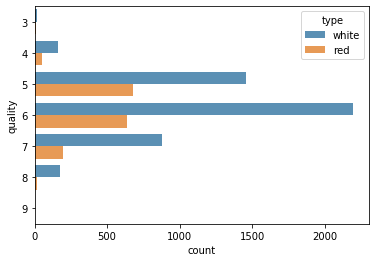

In [17]:
sns.countplot(data=wine,y='quality', hue='type', alpha=0.8)

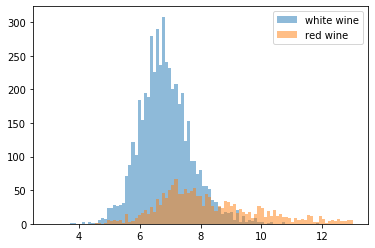

In [18]:
bins = np.linspace(3, 13, 100)
plt.hist(white_wine['fixed acidity'], bins, alpha=0.5, label='white wine')
plt.hist(red_wine['fixed acidity'], bins, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

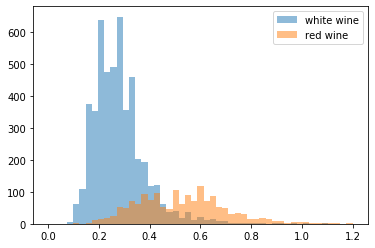

In [19]:
bins = np.linspace(0, 1.2, 50)
plt.hist(white_wine['volatile acidity'], bins, alpha=0.5, label='white wine')
plt.hist(red_wine['volatile acidity'], bins, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

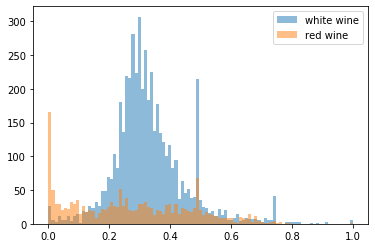

In [20]:
bins = np.linspace(0, 1, 100)
plt.hist(white_wine['citric acid'], bins, alpha=0.5, label='white wine')
plt.hist(red_wine['citric acid'], bins, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

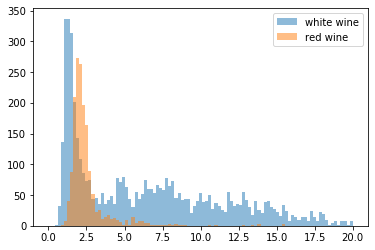

In [21]:
bins = np.linspace(0, 20, 100)
plt.hist(white_wine['residual sugar'], bins, alpha=0.5, label='white wine')
plt.hist(red_wine['residual sugar'], bins, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
# plt.xlim(0,10)
plt.show()

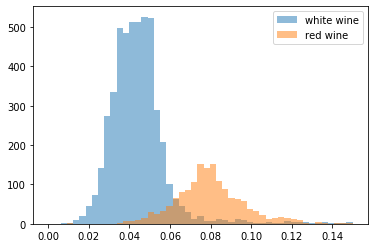

In [22]:
bins = np.linspace(0, 0.15, 50)
plt.hist(white_wine['chlorides'], bins, alpha=0.5, label='white wine')
plt.hist(red_wine['chlorides'], bins, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

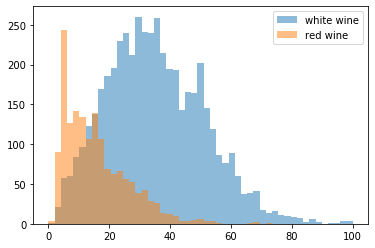

In [23]:
bins = np.linspace(0, 100, 50)
plt.hist(white_wine['free sulfur dioxide'], bins, alpha=0.5, label='white wine')
plt.hist(red_wine['free sulfur dioxide'], bins, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show() 

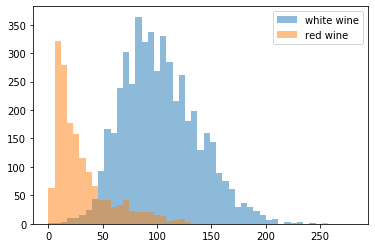

In [24]:
bins = np.linspace(0, 280, 50)
plt.hist(white_wine['bound_sulfer_dioxide'], bins, alpha=0.5, label='white wine')
plt.hist(red_wine['bound_sulfer_dioxide'], bins, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

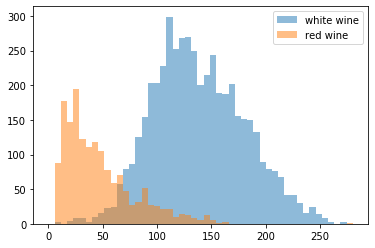

In [25]:
bins = np.linspace(0, 280, 50)
plt.hist(white_wine['total sulfur dioxide'], bins, alpha=0.5, label='white wine')
plt.hist(red_wine['total sulfur dioxide'], bins, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

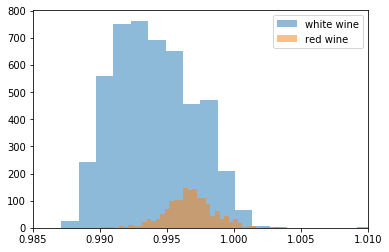

In [26]:
plt.hist(white_wine['density'],bins = 40, alpha=0.5, label='white wine')
plt.hist(red_wine['density'],bins = 40, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.xlim(0.985,1.01)
plt.show()

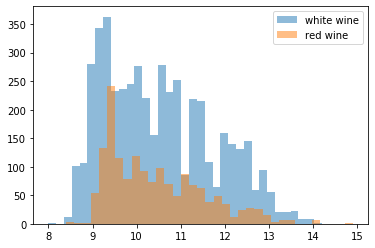

In [27]:
plt.hist(white_wine['alcohol'],bins = 35, alpha=0.5, label='white wine')
plt.hist(red_wine['alcohol'],bins = 35, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

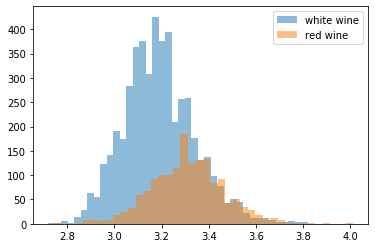

In [28]:
plt.hist(white_wine['pH'],bins = 40, alpha=0.5, label='white wine')
plt.hist(red_wine['pH'],bins = 40, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

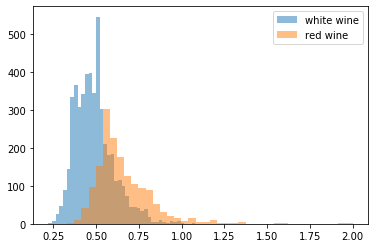

In [29]:
plt.hist(white_wine['sulphates'],bins = 40, alpha=0.5, label='white wine')
plt.hist(red_wine['sulphates'],bins = 40, alpha=0.5, label='red wine')
plt.legend(loc='upper right')
plt.show()

## Fixed acidity and quality

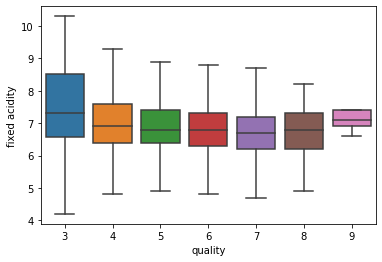

In [42]:
sns.boxplot(data = white_wine, x='quality',y='fixed acidity',showfliers = False)

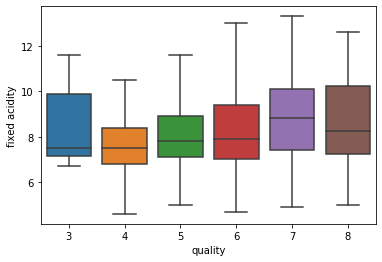

In [43]:
sns.boxplot(data = red_wine, x='quality',y='fixed acidity',showfliers = False)

## Volatile acidity and quality

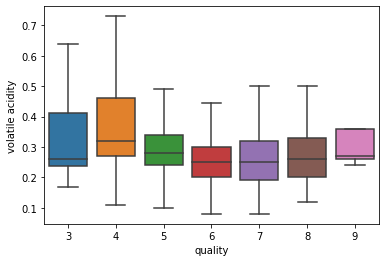

In [44]:
sns.boxplot(data = white_wine, x='quality',y='volatile acidity',showfliers = False)

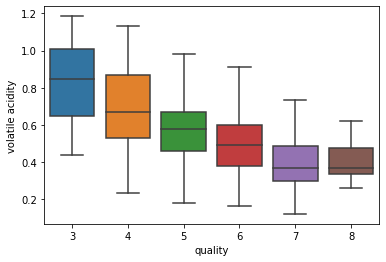

In [45]:
sns.boxplot(data = red_wine, x='quality',y='volatile acidity',showfliers = False)

It could have some relationship in the different way. If volatile acidity decrease, the quality will be increase

## Citric Acid vs Quality

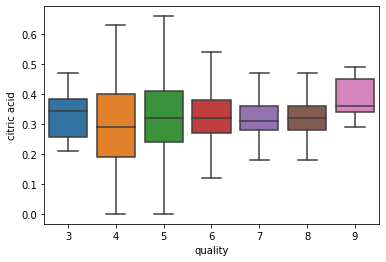

In [46]:
sns.boxplot(data = white_wine, x='quality',y='citric acid',showfliers = False)

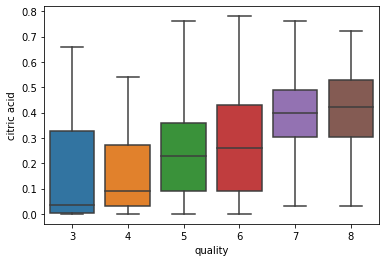

In [47]:
sns.boxplot(data = red_wine, x='quality',y='citric acid',showfliers = False)

It could have some relationship in the same way. If fixed acidity increase, the quality will be increase

## Residual Sugar

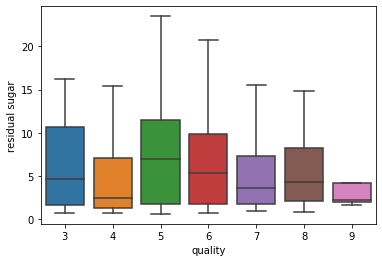

In [48]:
sns.boxplot(data = white_wine, x='quality', y='residual sugar',showfliers = False)

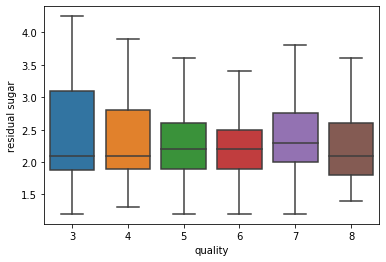

In [49]:
sns.boxplot(data = red_wine, x='quality', y='residual sugar',showfliers = False)

## Chlorides

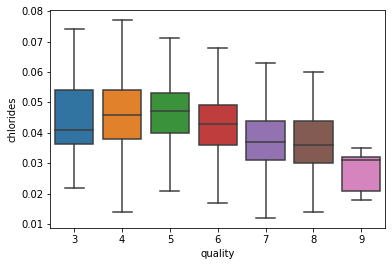

In [50]:
sns.boxplot(data = white_wine, x='quality', y='chlorides',showfliers = False)

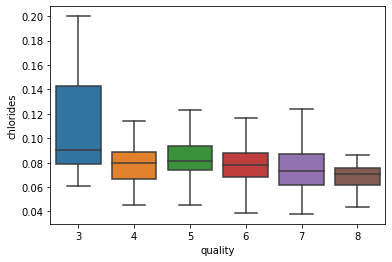

In [51]:
sns.boxplot(data = red_wine, x='quality', y='chlorides',showfliers = False)

## Free Sulfur dioxide

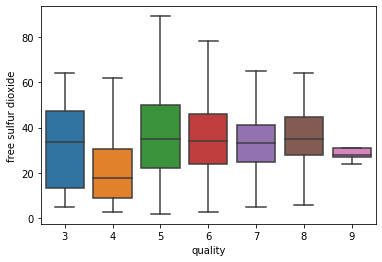

In [52]:
sns.boxplot(data = white_wine, x='quality', y='free sulfur dioxide',showfliers=False)

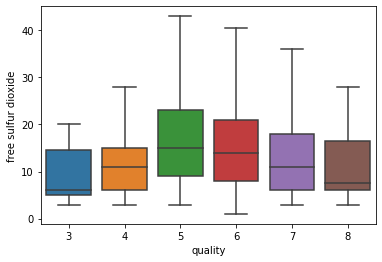

In [53]:
sns.boxplot(data = red_wine, x='quality', y='free sulfur dioxide',showfliers=False)

## Bound Sulfur Dioxide

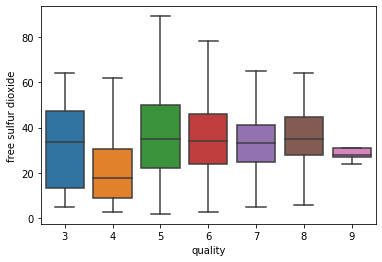

In [57]:
sns.boxplot(data = white_wine, x='quality', y='free sulfur dioxide',showfliers=False)

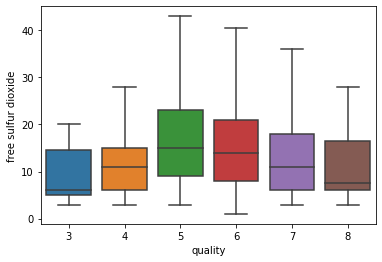

In [58]:
sns.boxplot(data = red_wine, x='quality', y='free sulfur dioxide',showfliers=False)

## Toltal sulfur dioxide

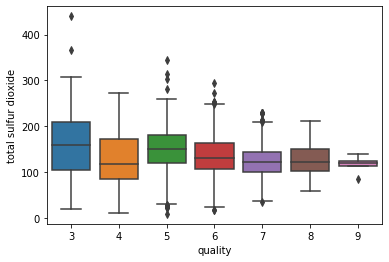

In [59]:
sns.boxplot(data = white_wine, x='quality', y='total sulfur dioxide')

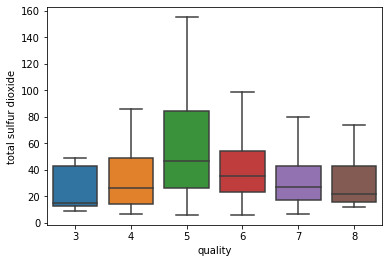

In [60]:
sns.boxplot(data = red_wine, x='quality', y='total sulfur dioxide',showfliers=False)

## Density

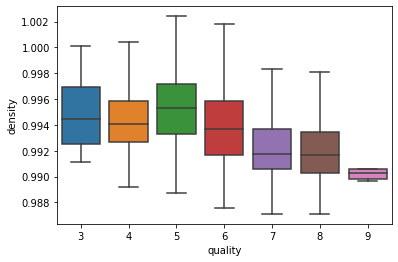

In [61]:
sns.boxplot(data = white_wine, x='quality', y='density',showfliers=False)

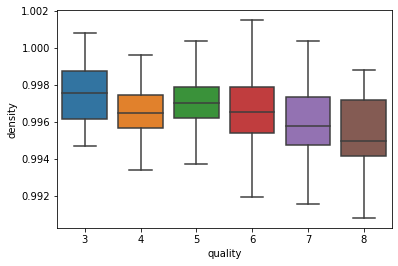

In [62]:
sns.boxplot(data = red_wine, x='quality', y='density',showfliers=False)

## PH

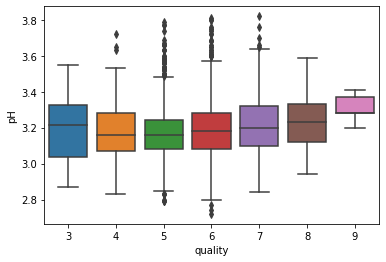

In [63]:
sns.boxplot(data = white_wine, x='quality', y='pH')

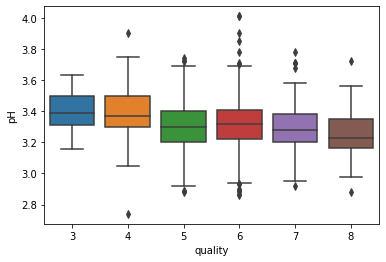

In [64]:
sns.boxplot(data = red_wine, x='quality', y='pH')

## Sulphates

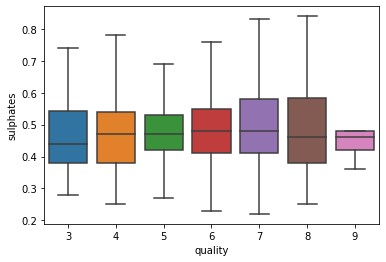

In [65]:
sns.boxplot(data = white_wine, x='quality', y='sulphates',showfliers=False)

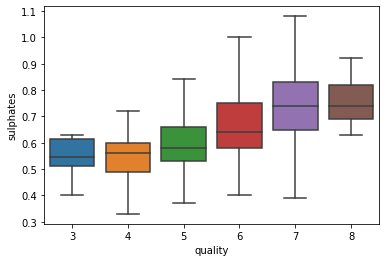

In [66]:
sns.boxplot(data = red_wine, x='quality', y='sulphates',showfliers=False)

## Alcohol

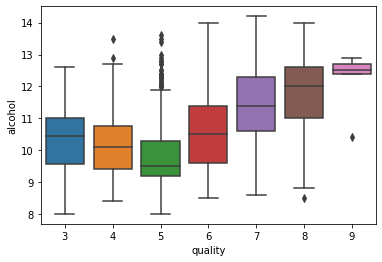

In [67]:
sns.boxplot(data = white_wine, x='quality', y='alcohol')

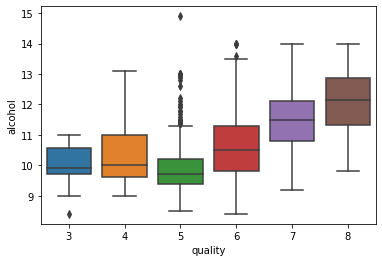

In [68]:
sns.boxplot(data = red_wine, x='quality', y='alcohol')

# Model

Before doing the model, we will change from 'red' and 'white' to numeric and separate in testing data and training data

In [69]:
wine_drop = wine.drop(columns = 'type')
wine_type = pd.get_dummies(wine['type'], drop_first=True)
wine_prep = pd.concat([wine_drop, wine_type], axis=1)
wine_prep['type'] = wine_prep['white']
wine_prep.drop(columns='white',inplace=True)
wine_prep.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [72]:
wine_train = wine_prep.sample(frac=0.7)
wine_test = wine_prep.drop(index=wine_train.index)
#Train data
x_train = wine_train.drop(columns = 'quality')
y_train = wine_train['quality']
#Test data
x_test = wine_test.drop(columns = 'quality')
y_test = wine_test['quality']

## Tree Decision Model

Firstly, we look quality is a classification because it doesn't have the decimal and there are only number from 3-9. So, we select decision tree to be our model

### Create Model

In [73]:
from sklearn.tree import DecisionTreeClassifier

Changing red and white to numeric

In [74]:
tree = DecisionTreeClassifier(min_samples_leaf = 10)
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Feature Importance

In [75]:
pd.DataFrame(dict(Feature = x_train.columns,
                 Value = tree.feature_importances_))\
.sort_values(by='Value',ascending = False)

,Feature,Value
10,alcohol,0.241575
1,volatile acidity,0.134798
6,total sulfur dioxide,0.083376
9,sulphates,0.080361
0,fixed acidity,0.071109
5,free sulfur dioxide,0.069002
7,density,0.067514
8,pH,0.066431
4,chlorides,0.062145
3,residual sugar,0.059199


### Prediction

In [76]:
res = tree.predict(x_test)
res

array([6, 6, 7, ..., 6, 6, 6])

In [77]:
res_predict = tree.predict_proba(x_test)
res_predict

array([[0.        , 0.        , 0.33333333, ..., 0.16666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.91666667, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.07142857, ..., 0.28571429, 0.        ,
        0.        ],
       [0.        , 0.        , 0.07142857, ..., 0.28571429, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2       , 0.1       ,
        0.        ]])

### Evaluation

In [78]:
from sklearn.metrics import classification_report

In [79]:
res = tree.predict(x_test)
print(classification_report(y_true = y_test, y_pred = res))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.56      0.30      0.39        33
           5       0.57      0.56      0.56       394
           6       0.57      0.64      0.60       568
           7       0.45      0.40      0.42       223
           8       0.35      0.19      0.25        42

    accuracy                           0.55      1264
   macro avg       0.42      0.35      0.37      1264
weighted avg       0.54      0.55      0.54      1264



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Linear Regression

In [80]:
import statsmodels.api as sm

Selecting stat model ordinary least square to do model because it can see the effect of variance and metric easier than linear regression of SKlearn

### First Model: Put every attribute into model

Add a new constant column for linear regression formula

In [81]:
x_train_lr = sm.add_constant(x_train)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Create a model

In [82]:
lr_model = sm.OLS(y_train,x_train_lr).fit()
lr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.292     
Dependent Variable:   quality            AIC:                  10177.0398
Date:                 2021-05-17 02:27   BIC:                  10260.5315
No. Observations:     4548               Log-Likelihood:       -5075.5   
Df Model:             12                 F-statistic:          157.6     
Df Residuals:         4535               Prob (F-statistic):   0.00      
R-squared:            0.294              Scale:                0.54715   
-------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|    [0.025   0.975] 
-------------------------------------------------------------------------
const                 97.0149  16.3478   5.9344 0.0000   64.9652 129.0647
fixed acidity          0.0752   0.0184   4.0833 0.0000    0.0391   0.1114
volatile acidity      -1.5257   0.0980 -15.5757 0.0000   -1.7178  -1.3337
citric acid           -0.0324   0.0962  -0.3363 0.7367   -0.2210   0.1563
residual sugar         0.0599   0.0070   8.6095 0.0000    0.0463   0.0735
chlorides             -0.8402   0.3916  -2.1458 0.0319   -1.6079  -0.0726
free sulfur dioxide    0.0053   0.0009   5.7766 0.0000    0.0035   0.0071
total sulfur dioxide  -0.0015   0.0004  -3.8156 0.0001   -0.0022  -0.0007
density              -96.0423  16.5808  -5.7924 0.0000 -128.5488 -63.5359
pH                     0.4841   0.1070   4.5232 0.0000    0.2743   0.6940
sulphates              0.6645   0.0918   7.2361 0.0000    0.4844   0.8445
alcohol                0.2294   0.0211  10.8729 0.0000    0.1880   0.2707
type                  -0.3588   0.0659  -5.4438 0.0000   -0.4880  -0.2296
-------------------------------------------------------------------------
Omnibus:                118.753         Durbin-Watson:            2.038  
Prob(Omnibus):          0.000           Jarque-Bera (JB):         285.775
Skew:                   -0.034          Prob(JB):                 0.000  
Kurtosis:               4.226           Condition No.:            283782 
=========================================================================
* The condition number is large (3e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

From the evaluation, the important key to determine the quality of wine is volatile acidity, chlorides, density, pH, sulphates, alcohol, and type.

### Second Model: Find interaction between attribute

We do the model again by remove unimportant key and find some interaction between model

In [83]:
from statsmodels.formula.api import ols

#### Remove unimportant key

In [84]:
x_train_lr_2 = x_train_lr.drop(columns = ['chlorides','citric acid'])

In [85]:
wine_train_2 = pd.concat([x_train_lr_2,y_train],axis=1)

Rename column to not have the space

In [86]:
import re

In [87]:
new_col_name = [re.sub(' ','_',x) for x in wine_train_2.columns]

In [88]:
new_col_name

['const',
 'fixed_acidity',
 'volatile_acidity',
 'residual_sugar',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type',
 'quality']

In [89]:
wine_train_2.columns = new_col_name

Create the formula

In [90]:
'+'.join(wine_train_2.columns)

'const+fixed_acidity+volatile_acidity+residual_sugar+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+type+quality'

In [94]:
lr_model2 = ols("quality ~ fixed_acidity:volatile_acidity+fixed_acidity+volatile_acidity+residual_sugar+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+type",data = wine_train_2).fit()
lr_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.294     
Dependent Variable:       quality               AIC:                     10167.0032
Date:                     2021-05-17 02:28      BIC:                     10244.0725
No. Observations:         4548                  Log-Likelihood:          -5071.5   
Df Model:                 11                    F-statistic:             173.0     
Df Residuals:             4536                  Prob (F-statistic):      0.00      
R-squared:                0.296                 Scale:                   0.54606   
-----------------------------------------------------------------------------------
                                 Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
-----------------------------------------------------------------------------------
Intercept                       109.5237  16.3864  6.6838 0.0000   77.3984 141.6491
fixed_acidity:volatile_acidity    0.1881   0.0518  3.6325 0.0003    0.0866   0.2896
fixed_acidity                     0.0107   0.0258  0.4146 0.6785   -0.0399   0.0613
volatile_acidity                 -2.9351   0.3958 -7.4162 0.0000   -3.7110  -2.1592
residual_sugar                    0.0654   0.0070  9.3994 0.0000    0.0517   0.0790
free_sulfur_dioxide               0.0050   0.0009  5.4202 0.0000    0.0032   0.0068
total_sulfur_dioxide             -0.0014   0.0004 -3.6193 0.0003   -0.0021  -0.0006
density                        -108.4017  16.5903 -6.5340 0.0000 -140.9268 -75.8766
pH                                0.5647   0.1049  5.3837 0.0000    0.3591   0.7704
sulphates                         0.6354   0.0897  7.0856 0.0000    0.4596   0.8112
alcohol                           0.2232   0.0210 10.6516 0.0000    0.1822   0.2643
type                             -0.3688   0.0655 -5.6313 0.0000   -0.4972  -0.2404
-----------------------------------------------------------------------------------
Omnibus:                    118.401            Durbin-Watson:               2.041  
Prob(Omnibus):              0.000              Jarque-Bera (JB):            285.430
Skew:                       -0.026             Prob(JB):                    0.000  
Kurtosis:                   4.226              Condition No.:               284506 
===================================================================================
* The condition number is large (3e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

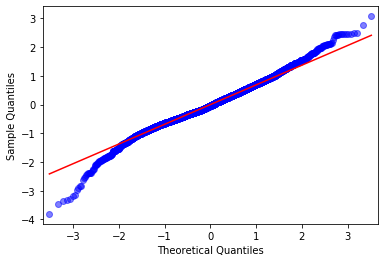

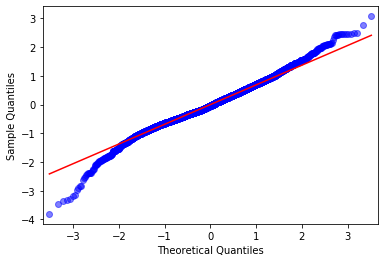

In [95]:
sm.qqplot(lr_model2.resid,line='q',alpha=0.5)

### Doing Model Third Time

In [96]:
x_train_lr_3 = x_train_lr_2.drop(columns = ['pH'])

In [97]:
lr_model3 = sm.OLS(y_train,x_train_lr_3).fit()
lr_model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      0.288     
Dependent Variable:    quality           AIC:                 10202.1647
Date:                  2021-05-17 02:28  BIC:                 10266.3892
No. Observations:      4548              Log-Likelihood:      -5091.1   
Df Model:              9                 F-statistic:         205.4     
Df Residuals:          4538              Prob (F-statistic):  0.00      
R-squared:             0.289             Scale:               0.55054   
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
const                 53.4596  13.3312   4.0101 0.0001  27.3239  79.5953
fixed acidity          0.0137   0.0127   1.0783 0.2809  -0.0112   0.0385
volatile acidity      -1.5667   0.0916 -17.1003 0.0000  -1.7464  -1.3871
residual sugar         0.0415   0.0056   7.3731 0.0000   0.0305   0.0526
free sulfur dioxide    0.0055   0.0009   5.9847 0.0000   0.0037   0.0073
total sulfur dioxide  -0.0016   0.0004  -4.0397 0.0001  -0.0023  -0.0008
density              -50.7882  13.3284  -3.8105 0.0001 -76.9183 -24.6580
sulphates              0.5707   0.0894   6.3822 0.0000   0.3954   0.7460
alcohol                0.2880   0.0176  16.3251 0.0000   0.2534   0.3226
type                  -0.3086   0.0650  -4.7459 0.0000  -0.4361  -0.1811
------------------------------------------------------------------------
Omnibus:               111.636         Durbin-Watson:            2.040  
Prob(Omnibus):         0.000           Jarque-Bera (JB):         261.845
Skew:                  -0.016          Prob(JB):                 0.000  
Kurtosis:              4.175           Condition No.:            228995 
========================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
predicted = gbr.predict(x_test)

In [101]:
from sklearn.metrics import mean_absolute_error

In [102]:
mean_absolute_error(y_test,predicted)

0.5219384785227715

In [103]:
prediction_df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
prediction_df.head(20)

,Actual,Predicted
7,6,5.467913
9,6,6.022036
15,7,6.300641
37,6,5.972399
64,6,5.876920
77,7,6.270082
87,6,5.636302
115,4,4.567486
127,7,5.644723
160,7,6.598564
